In [1]:
import numpy as np
import cv2 #OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 3.4.0


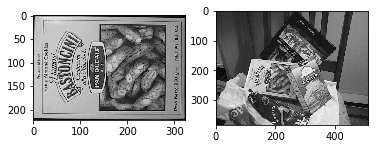

In [2]:
# Open and show images

img1 = cv2.imread('C:/Users/Manisha/Desktop/OpenCV/images/box.png')

img2 = cv2.imread('C:/Users/Manisha/Desktop/OpenCV/images/box_in_scene.png')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [8]:
import time



In [9]:
# SIFT feature extracting
sift = cv2.xfeatures2d.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

start_time = time.time()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
print('Elapsed time: %.6fs' % (time.time() - start_time))

print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

Elapsed time: 0.177224s
Image 1 - 604 feature detected
Image 2 - 969 feature detected


In [10]:
# BFMatcher(Brute Force Matcher) with default setting
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
print('%d matches' % len(matches))

604 matches


In [11]:
# Inspect matcher results
print (type(matches))
print (len(matches))
print (type(matches[0]))
print (len(matches[0]))

<class 'list'>
604
<class 'list'>
2


In [12]:
# Apply ratio test as in David Rowe's paper.
# This is taken from an example in the documentation.
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

80 matches


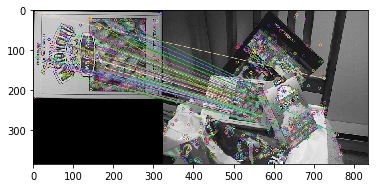

In [13]:
# Display matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))